In [155]:
import pandas as pd
from pykrx import stock
# stock_df = stock.get_market_ohlcv_by_date('20000101','20191231','000660') # sk 하이닉스 001250
# stock_df = stock.get_market_ohlcv_by_date('20000101','20191231','005930')
stock_df = stock.get_market_ohlcv_by_date('20000101','20191231','001250') 
stock_df_close = stock_df[['종가']]
stock_df_close.head()

,종가
날짜,
2000-01-04,92573
2000-01-05,93962
2000-01-06,90260
2000-01-07,88870
2000-01-10,92573


In [156]:
import FinanceDataReader as fdr

stock_df = fdr.DataReader('MSFT', '20000101', '20191231') 
stock_df.tail()
stock_df_close = stock_df[['Close']].rename(columns={'Close': '종가'})

In [157]:
# 전날과 비교
stock_df_close['변화량'] = stock_df_close['종가'] - stock_df_close['종가'].shift(1)
stock_df_close.head()

,종가,변화량
2000-01-03,58.28125,NaN
2000-01-04,56.31250,-1.96875
2000-01-05,56.90625,0.59375
2000-01-06,55.00000,-1.90625
2000-01-07,55.71875,0.71875


In [158]:
# 음수면 하락, 양수면 상승
condition_up = stock_df_close['변화량'] >= 0 
condition_down = stock_df_close['변화량'] < 0 
condition_down.head() 

2000-01-03    False
2000-01-04     True
2000-01-05    False
2000-01-06     True
2000-01-07    False
Name: 변화량, dtype: bool

In [159]:
stock_df_close.loc[condition_up, '상승폭'] = stock_df_close['변화량']
stock_df_close.loc[condition_down, '하락폭'] = -stock_df_close['변화량'] # 음수 제거 해야함
stock_df_close.head()

,종가,변화량,상승폭,하락폭
2000-01-03,58.28125,NaN,NaN,NaN
2000-01-04,56.31250,-1.96875,NaN,1.96875
2000-01-05,56.90625,0.59375,0.59375,NaN
2000-01-06,55.00000,-1.90625,NaN,1.90625
2000-01-07,55.71875,0.71875,0.71875,NaN


In [160]:
stock_df_close = stock_df_close.fillna(0)
stock_df_close.head()

,종가,변화량,상승폭,하락폭
2000-01-03,58.28125,0.00000,0.00000,0.00000
2000-01-04,56.31250,-1.96875,0.00000,1.96875
2000-01-05,56.90625,0.59375,0.59375,0.00000
2000-01-06,55.00000,-1.90625,0.00000,1.90625
2000-01-07,55.71875,0.71875,0.71875,0.00000


In [161]:
stock_df_close['AU'] = stock_df_close['상승폭'].rolling(window=14).mean()
stock_df_close['DU'] = stock_df_close['하락폭'].rolling(window=14).mean()
stock_df_close[13:20]

,종가,변화량,상승폭,하락폭,AU,DU
2000-01-21,51.87500,-1.12500,0.00000,1.12500,0.462054,0.919643
2000-01-24,50.62500,-1.25000,0.00000,1.25000,0.462054,1.008929
2000-01-25,51.40625,0.78125,0.78125,0.00000,0.517857,0.868304
2000-01-26,49.68750,-1.71875,0.00000,1.71875,0.475446,0.991071
2000-01-27,49.37500,-0.31250,0.00000,0.31250,0.475446,0.877232
2000-01-28,49.12500,-0.25000,0.00000,0.25000,0.424107,0.895089
2000-01-31,48.93750,-0.18750,0.00000,0.18750,0.395089,0.908482


In [162]:
# RSI = 100 - (100 / (1 + (평균 상승폭 / 평균 하락폭)))
stock_df_close['RSI'] = (stock_df_close['AU'] / (stock_df_close['AU'] + stock_df_close['DU'])) * 100 
stock_df_close[13:20]

,종가,변화량,상승폭,하락폭,AU,DU,RSI
2000-01-21,51.87500,-1.12500,0.00000,1.12500,0.462054,0.919643,33.441034
2000-01-24,50.62500,-1.25000,0.00000,1.25000,0.462054,1.008929,31.411229
2000-01-25,51.40625,0.78125,0.78125,0.00000,0.517857,0.868304,37.359098
2000-01-26,49.68750,-1.71875,0.00000,1.71875,0.475446,0.991071,32.420091
2000-01-27,49.37500,-0.31250,0.00000,0.31250,0.475446,0.877232,35.148515
2000-01-28,49.12500,-0.25000,0.00000,0.25000,0.424107,0.895089,32.148900
2000-01-31,48.93750,-0.18750,0.00000,0.18750,0.395089,0.908482,30.308219


In [163]:
def calc(series):
    result = []
    current_state = False  # 초기 상태는 False
    
    for value in series:
        if current_state:  # True 상태일 때
            if value >= 70:  # 70 이상이면 False로 전환
                current_state = False
        else:  # False 상태일 때
            if value <= 30:  # 30 이하면 True로 전환
                current_state = True
        
        result.append(current_state)
    
    return result

In [164]:
# 30 이하에 사서 70 이상에 판다 다시 30 이하에 사서 70 이상에 판다
# false 30이하 구매 true 70 이상에 false 
# true중 최초 종가를 true중 마지막 종가에서 빼면 수익률 과 기간  
stock_df_close['bool'] = calc(stock_df_close['RSI'])
stock_df_close['bool'][:-200]


2000-01-03    False
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07    False
              ...  
2019-03-11    False
2019-03-12    False
2019-03-13    False
2019-03-14    False
2019-03-15    False
Name: bool, Length: 4830, dtype: bool

In [165]:
stock_df_close['전일종가'] = stock_df_close['종가'].shift(periods=1)

In [166]:
import numpy as np
delta_days = stock_df_close.index[-1] - stock_df_close.index[0]
year = delta_days.days / 365

stock_df_close['수익률'] = np.where(stock_df_close['bool'], stock_df_close['종가'] / stock_df_close['전일종가'], 1)
stock_df_close['누적수익률'] = stock_df_close['수익률'].cumprod()
CAGR = stock_df_close['누적수익률'].iloc[-1] ** (1/year) -1


In [167]:
CAGR

-0.05599900572619876

In [168]:
simple_rate_of_return = stock_df_close['종가'].iloc[-1] / stock_df_close['종가'].iloc[0]
simple_cum_rate_of_return = 1 * simple_rate_of_return
CAGR = ((simple_cum_rate_of_return ** (1/year))-1) * 100
CAGR

5.098624194207169

In [169]:
stock_df_close.tail()

,종가,변화량,상승폭,하락폭,AU,DU,RSI,bool,전일종가,수익률,누적수익률
2019-12-23,157.410004,0.000000,0.000000,0.000000,0.705715,0.127143,84.734149,False,157.410004,1.0,0.315777
2019-12-24,157.380005,-0.029999,0.000000,0.029999,0.667143,0.129286,83.766829,False,157.410004,1.0,0.315777
2019-12-26,158.669998,1.289993,1.289993,0.000000,0.753572,0.129286,85.356008,False,157.380005,1.0,0.315777
2019-12-27,158.960007,0.290009,0.290009,0.000000,0.644286,0.129286,83.287191,False,158.669998,1.0,0.315777
2019-12-30,157.589996,-1.370010,0.000000,1.370010,0.644286,0.199286,76.375906,False,158.960007,1.0,0.315777


In [170]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

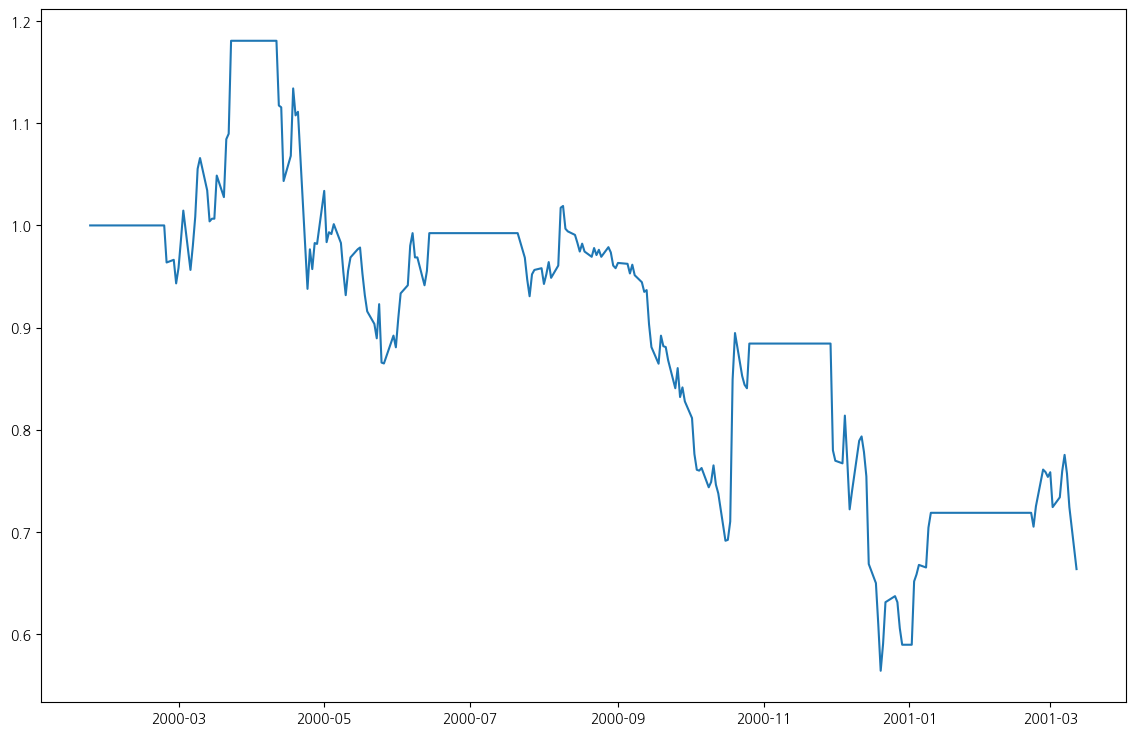

In [173]:
plt.figure(figsize=(14,9), dpi=100) #  stock_df_close['수익률']
# plt.plot(stock_df_close['종가'][14:300]/10000)
# plt.plot(stock_df_close['RSI'][14:300])
# plt.plot(stock_df_close['수익률'][14:300])
plt.plot(stock_df_close['누적수익률'][14:300])
plt.show()